### Метод ближайших соседей k-NN

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 1000
random_state = 42
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = n_samples, cluster_std = [1.6, 1.0, 1.0],
                 centers = [(-7, -7), (1, 1), (7, 5)],
                 random_state = random_state)

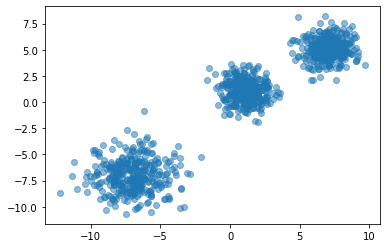

In [3]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.5)

In [4]:
all = np.array([[0, 0],
                [1, 0],
                [0, 1],
                [1, 1],
                [2, 1],
                [1, 2],
                [2, 2],
                [3, 2],
                [6, 6],
                [7, 6],
                [8, 6],
                [6, 7],
                [7, 7],
                [8, 7],
                [9, 7],
                [7, 8],
                [8, 8],
                [9, 8],
                [8, 9],
                [9, 9],])
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(3)
model_5 = KNeighborsClassifier(5)

In [6]:
from sklearn.model_selection import train_test_split
all_train, all_test, label_train, label_test = train_test_split(all, label,
                                                               test_size = 0.7,
                                                               random_state = random_state)

In [7]:
knn_3 = model_3.fit(all_train, label_train)
print(knn_3.predict([[0, 0.3]]))

[0]


In [8]:
knn_3_predict = knn_3.predict(all_test)
knn_3_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [9]:
# Сравниваем с эталонными значениями
label_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [10]:
# Объединяем массивы
all_3 = np.vstack([all_train, all_test])
label_3 = np.hstack([label_train, label_test])

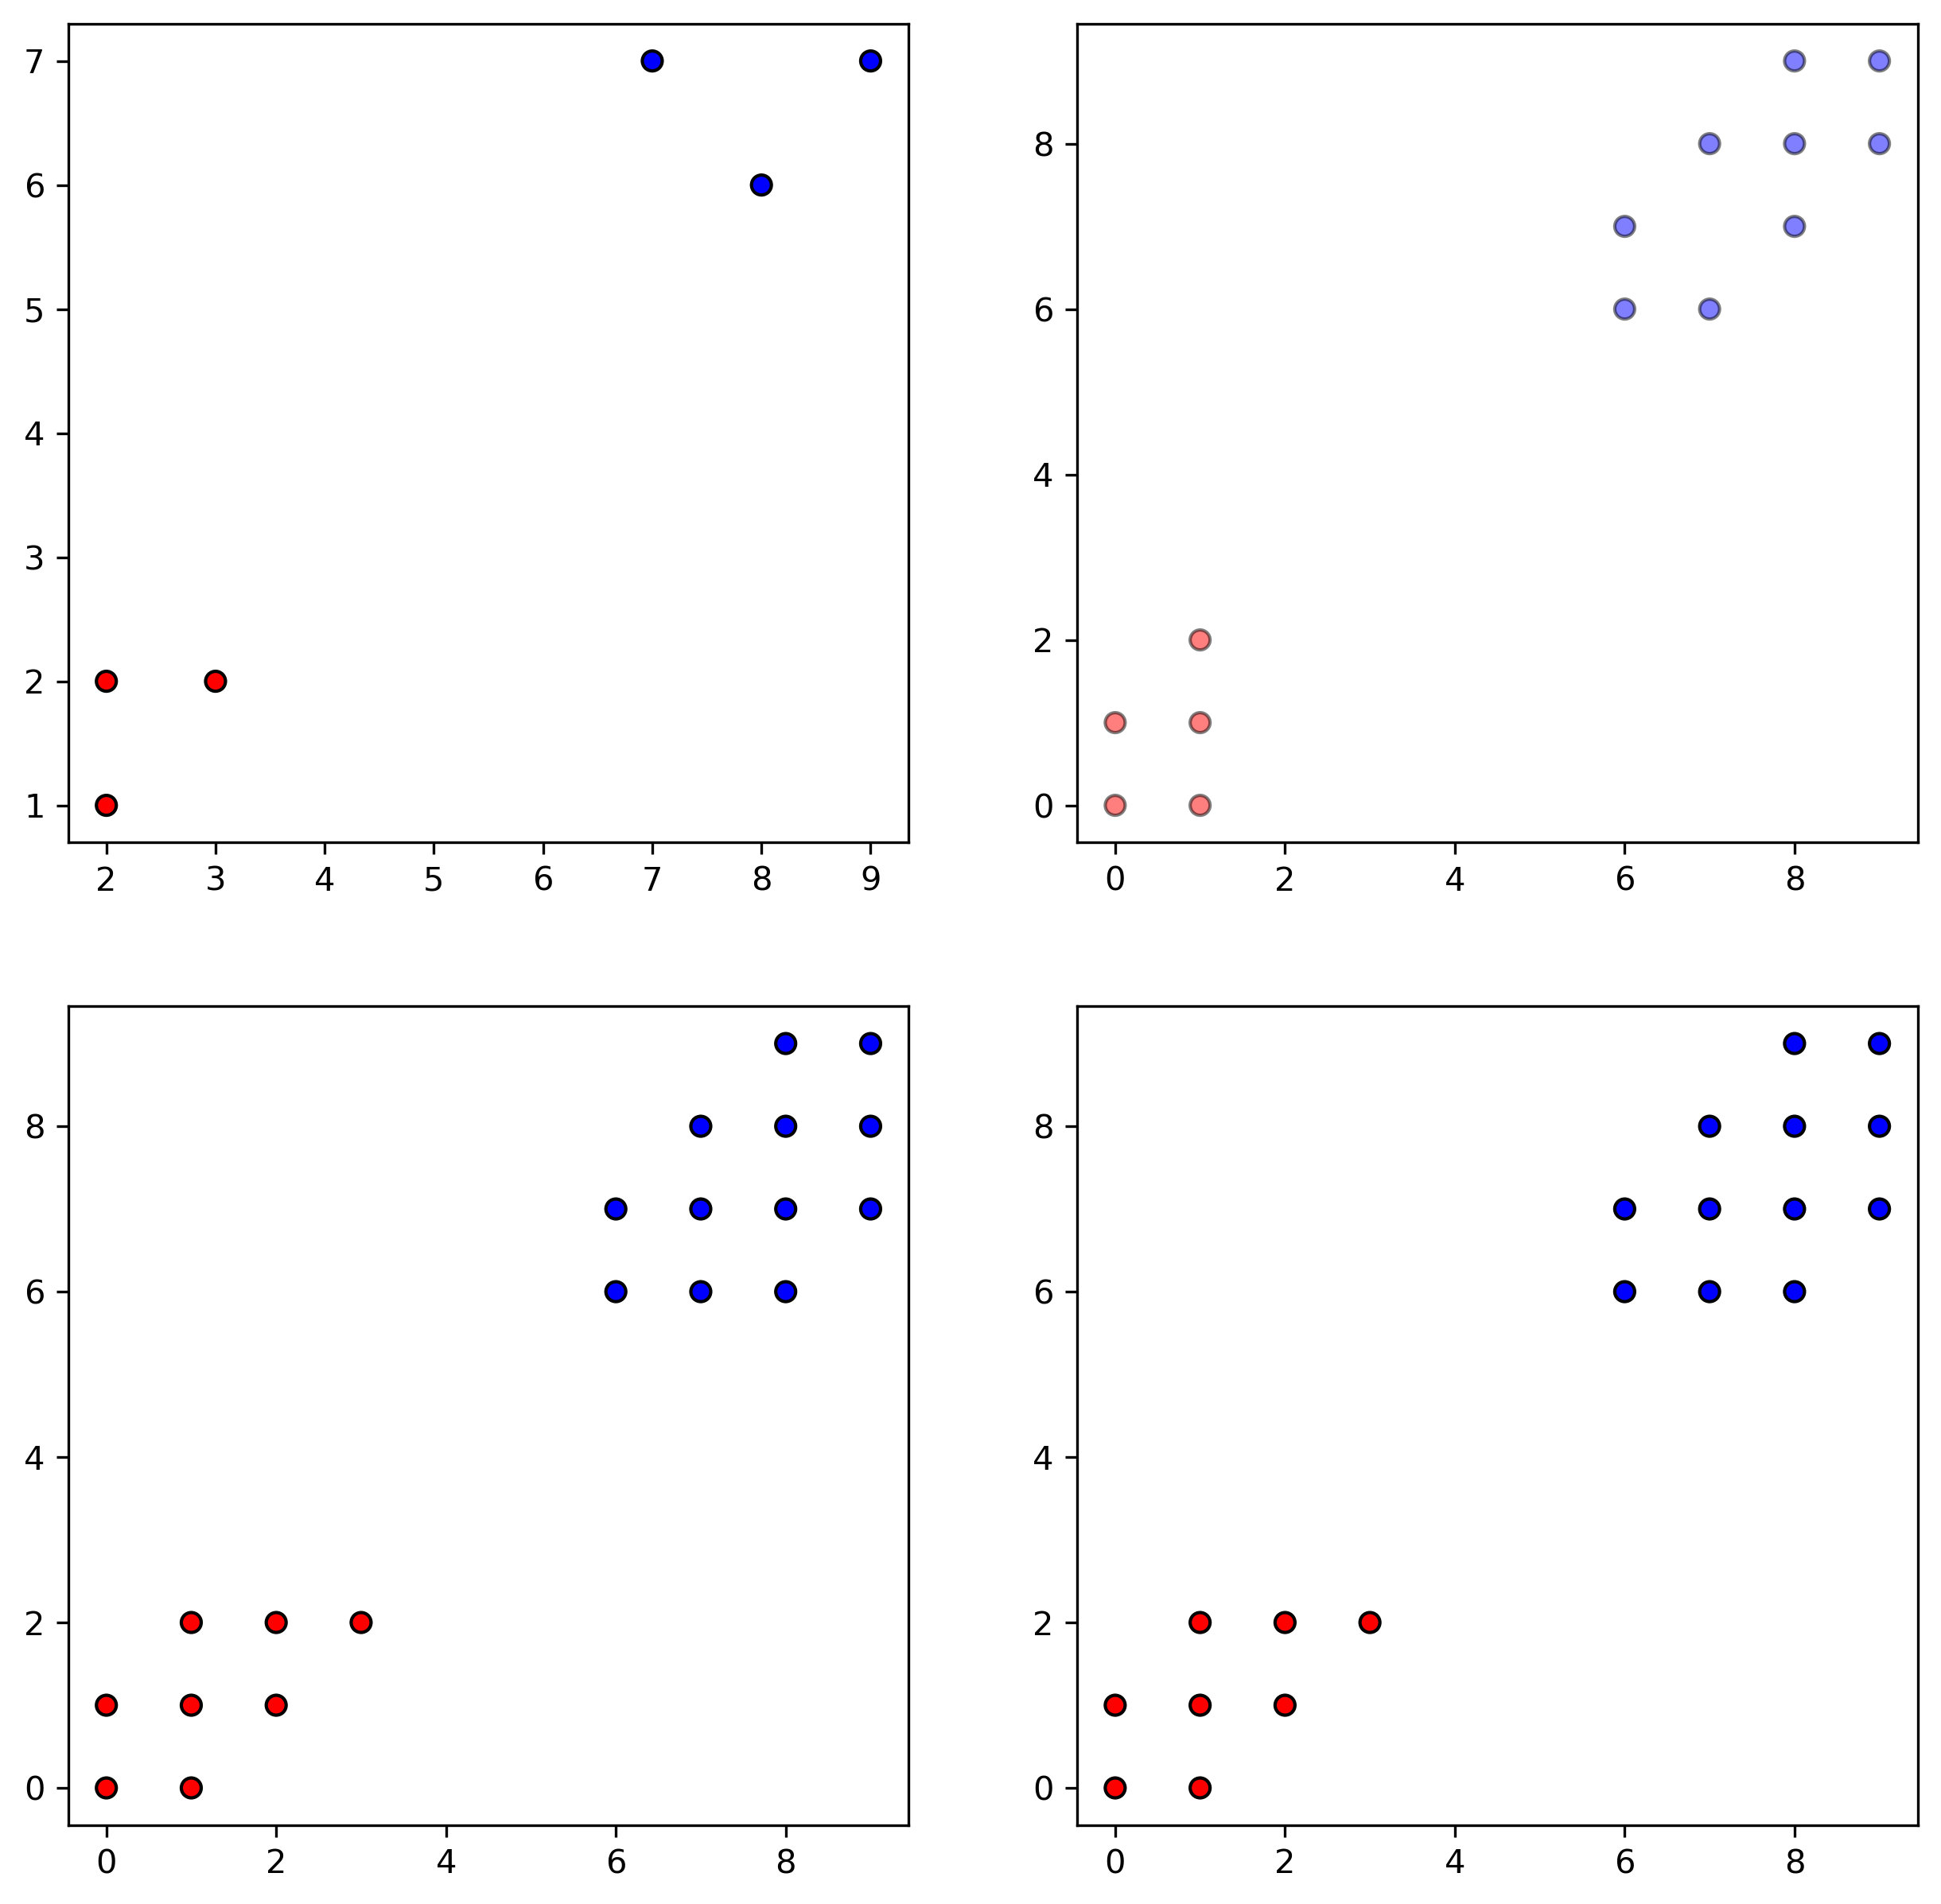

In [11]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig = plt.figure(figsize = (10, 10), dpi = 300)
ax = fig.add_subplot(221)
# train
plt.scatter(all_train[:, 0], all_train[:, 1], c = label_train,
            cmap = cm_bright, edgecolors = 'k')
ax = fig.add_subplot(222)
# test
plt.scatter(all_test[:, 0], all_test[:, 1], c = label_test,
            cmap = cm_bright, edgecolors = 'k', alpha = 0.5)
ax = fig.add_subplot(223)
# априорные данные
plt.scatter(all[:, 0], all[:, 1], c = label,
            cmap = cm_bright, edgecolors = 'k')
ax = fig.add_subplot(224)
# объединенные
plt.scatter(all_3[:, 0], all_3[:, 1], c = label_3,
            cmap = cm_bright, edgecolors = 'k')

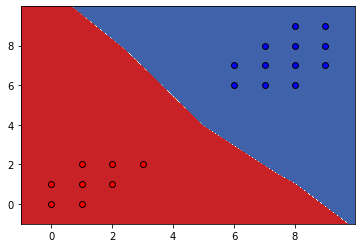

In [12]:
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

x_min, x_max = all[:, 0].min() - 1, all[:, 0].max() + 1
y_min, y_max = all[:, 1].min() - 1, all[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = .5, w_pad = .5, pad = 2.5)

Z = knn_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(label == i)
    plt.scatter(
        all[idx, 0],
        all[idx, 1],
        c = color,
        cmap = plt.cm.PuBu,
        edgecolor = 'black',
        s = 35
    )

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [14]:
knn_blob = model_5.fit(X_train, y_train)
knn_pred_blob = knn_blob.predict(X_test)
print(f"Кол-во ошибок предсказания: {(y_test != knn_pred_blob).sum()}")

Кол-во ошибок предсказания: 0


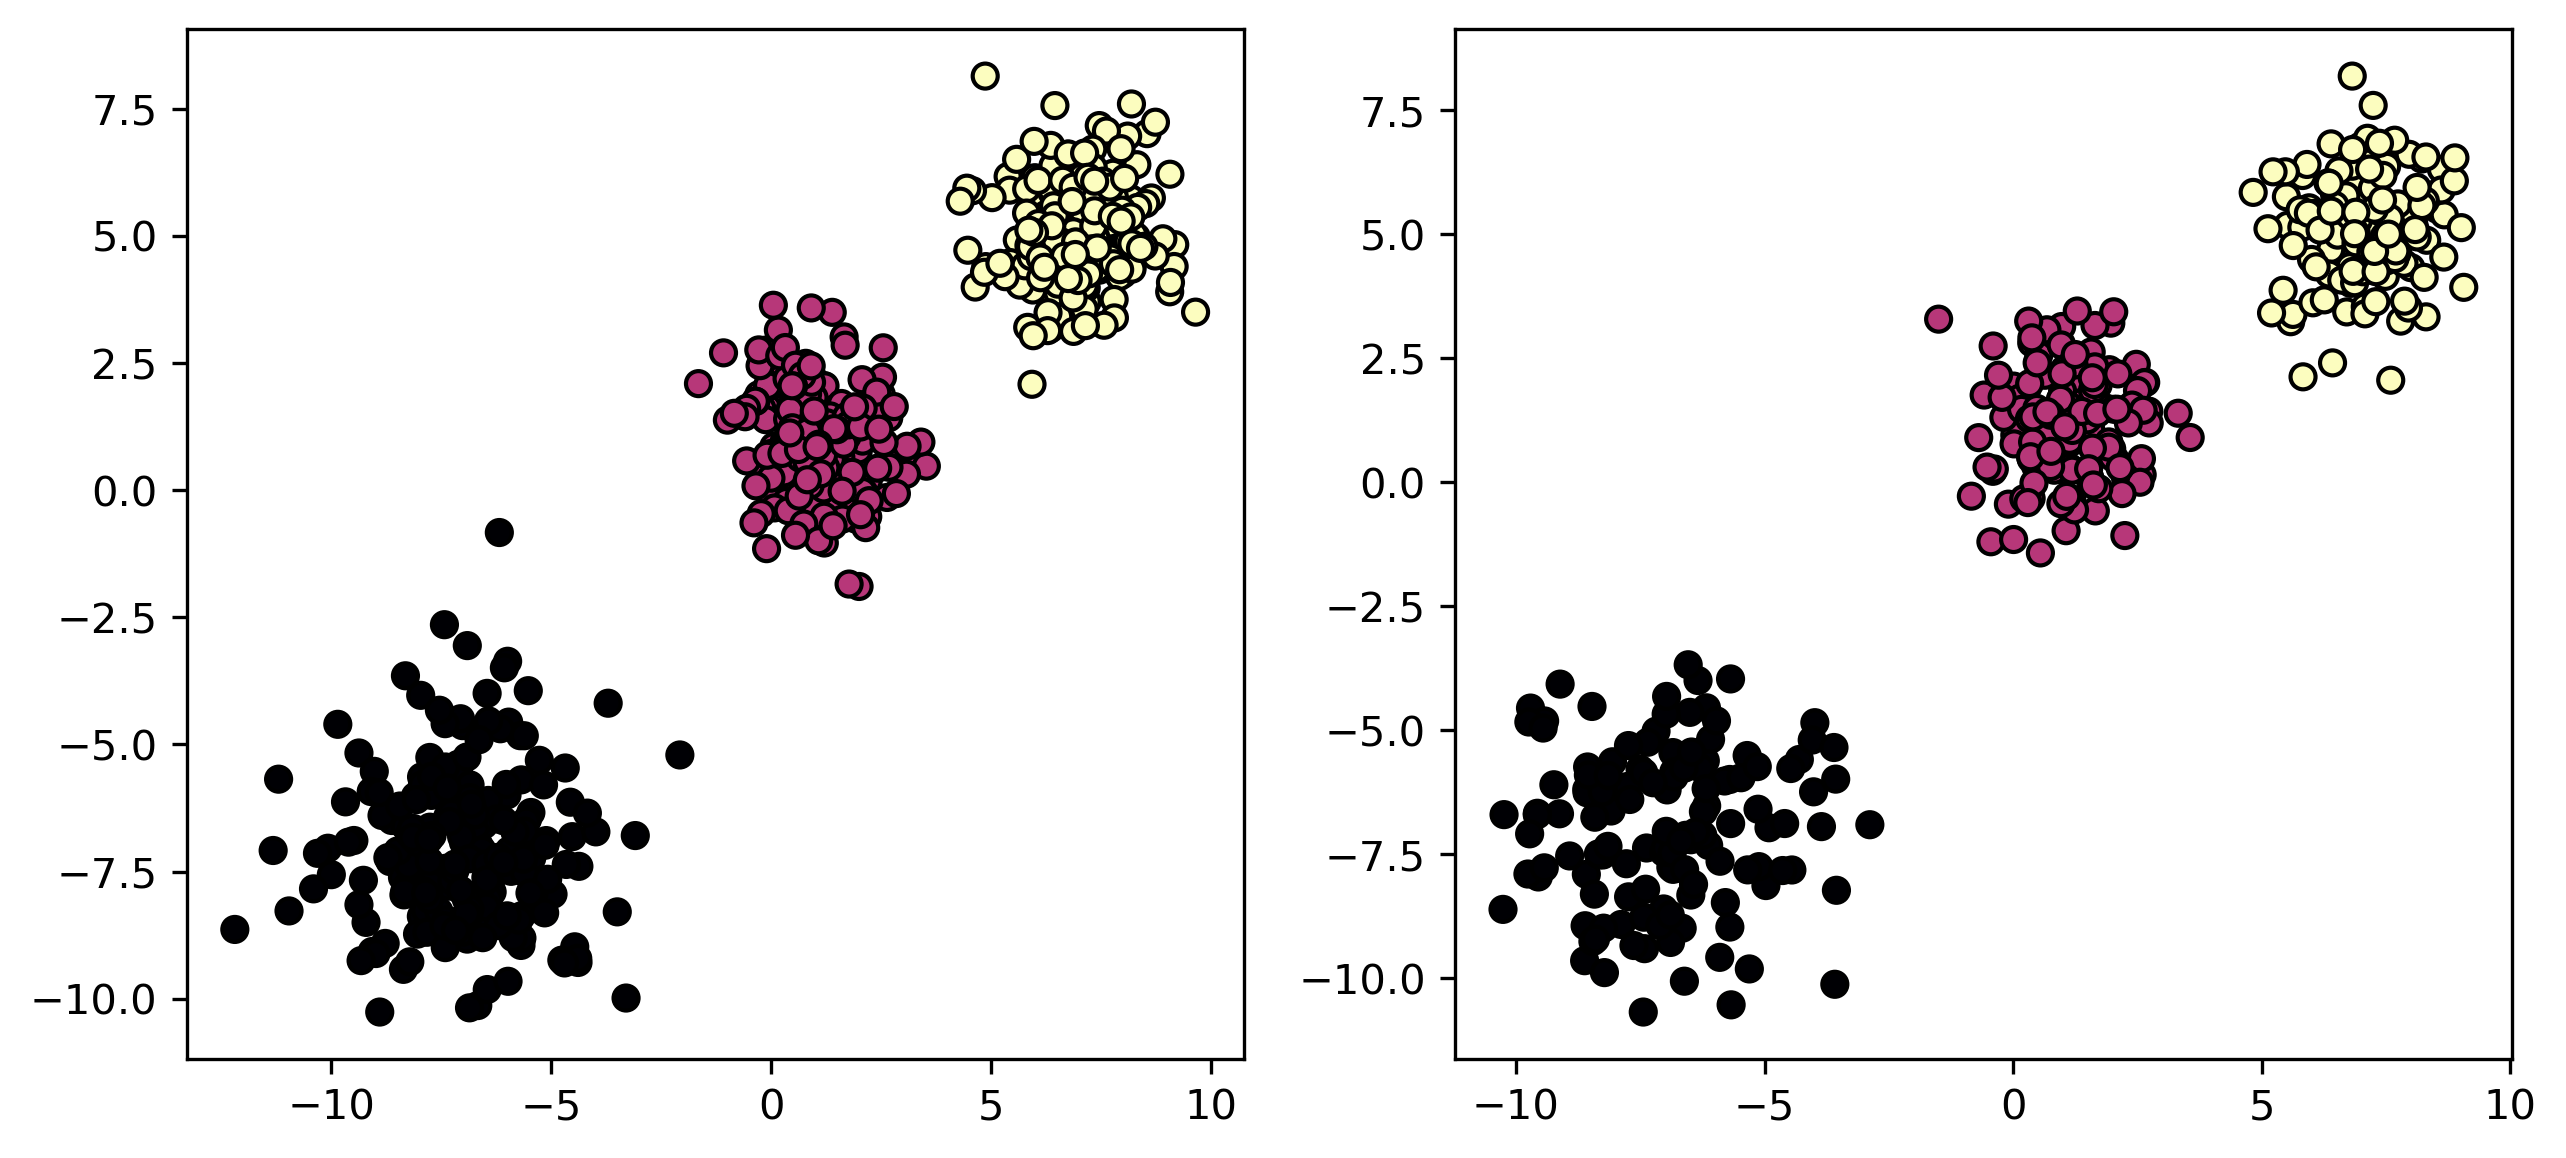

In [15]:
fig = plt.figure(figsize = (10, 10), dpi = 300)
ax = fig.add_subplot(221)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train,
            cmap = 'magma', edgecolors = 'k')
ax = fig.add_subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test,
            cmap = 'magma', edgecolors = 'k')

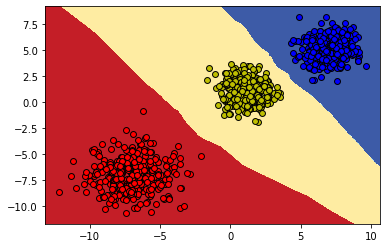

In [16]:
# Строим области достижимости
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = .5, w_pad = .5, pad = 2.5)

Z = knn_blob.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c = color,
        cmap = plt.cm.PuBu,
        edgecolor = 'black',
        s = 35
    )